- Scipy의 stats 서브 패키지에 있는 binom 클래스는 이항 분포 클래스이다. n 인수와 p 인수를 사용하여 모수를 설정한다

In [1]:
N = 10
theta = 0.6
rv = sp.stats.binom(N, theta)
rv

- pmf 메서드를 사용하면, 확률 질량 함수 (pmf: probability mass function)를 계산할 수 있다. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


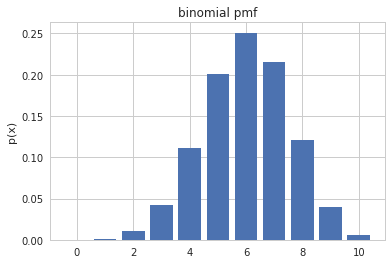

In [4]:
%matplotlib inline
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.ylabel('p(x)')
plt.title('binomial pmf')
plt.show()

- 시뮬레이션을 하려면 rvs 메서드를 사용한다.

In [5]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


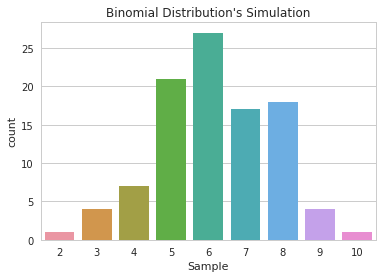

In [6]:
sns.countplot(x)
plt.title("Binomial Distribution's Simulation")
plt.xlabel('Sample')
plt.show()

- 이론적인 확률 분포와 샘플의 확률 분포를 동시에 나타내려면 다음과 같은 코드를 사용한다.

In [8]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({'Theory': rv.pmf(xx), 'simulation': y}).stack()
df = df.reset_index()
df.columns = ['values', 'type', 'ratio']
df.pivot('values', 'type', 'ratio')
df

,values,type,ratio
0,0,Theory,0.000105
1,0,simulation,0.000000
2,1,Theory,0.001573
3,1,simulation,0.000000
4,2,Theory,0.010617
5,2,simulation,0.010000
6,3,Theory,0.042467
7,3,simulation,0.040000
8,4,Theory,0.111477
9,4,simulation,0.070000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


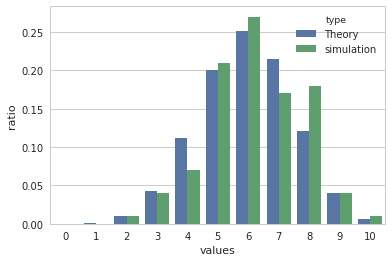

In [9]:
sns.barplot(x='values', y='ratio', hue='type', data=df)
plt.show()

#### 연습 문제 1
- 이항 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후, 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다.
- 샘풀의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.
- 1. Theta = 0.5, N = 5
- 2. Theta = 0.9, N = 20

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


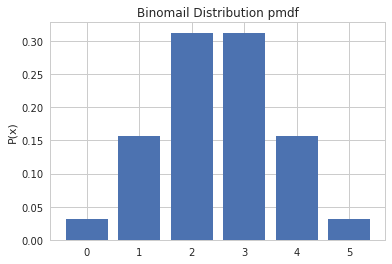

In [15]:
# 연습문제 1 - 1
N = 5
theta = 0.5
rv = sp.stats.binom(N, theta)

xx10 = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx10), align='center')
plt.ylabel('P(x)')
plt.title('Binomail Distribution pmdf')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


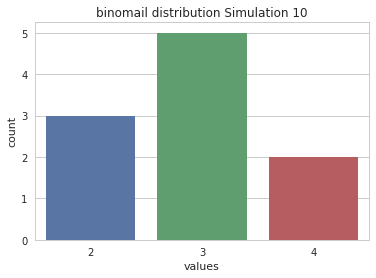

In [16]:
# sample 갯수 10개 일 때
np.random.seed(0)
x10 = rv.rvs(10)
sns.countplot(x10)
plt.title('binomail distribution Simulation 10')
plt.xlabel('values')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


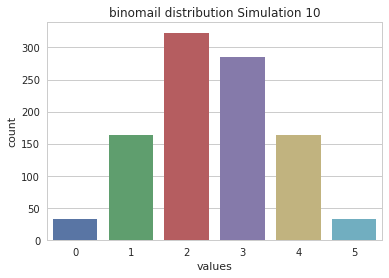

In [17]:
# sample 갯수가 1000개 일 때
x1000 = rv.rvs(1000)
sns.countplot(x1000)
plt.title('binomail distribution Simulation 10')
plt.xlabel('values')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


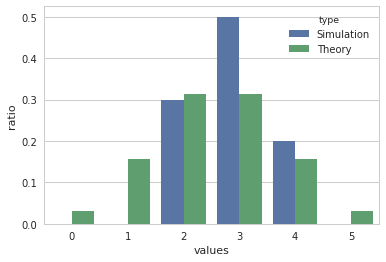

In [22]:
y10 = np.bincount(x10, minlength = N + 1)/float(len(x10))
df = pd.DataFrame({'Theory': rv.pmf(xx10), 'Simulation': y10}).stack()
df = df.reset_index()
df.columns = ['values', 'type', 'ratio']
df.pivot('values', 'type', 'ratio')
sns.barplot(x='values', y='ratio', hue='type', data=df)
plt.show()

In [23]:
df

,values,type,ratio
0,0,Simulation,0.00000
1,0,Theory,0.03125
2,1,Simulation,0.00000
3,1,Theory,0.15625
4,2,Simulation,0.30000
5,2,Theory,0.31250
6,3,Simulation,0.50000
7,3,Theory,0.31250
8,4,Simulation,0.20000
9,4,Theory,0.15625


#### 샘플 갯수가 1000개일 경우에 theta = 0.9, N = 20

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


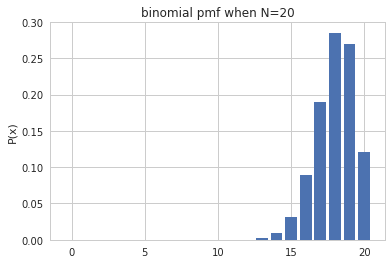

In [25]:
N = 20
theta = 0.9
rv = sp.stats.binom(N, theta)

xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align = 'center')
plt.ylabel('P(x)')
plt.title('binomial pmf when N=20')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


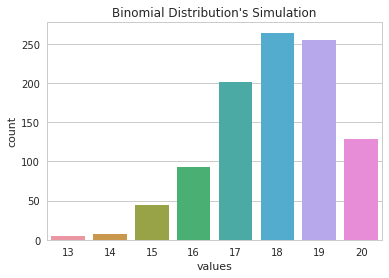

In [26]:
x1000 = rv.rvs(1000) # sample 1000개 생성
sns.countplot(x1000)
plt.title("Binomial Distribution's Simulation")
plt.xlabel('values')
plt.show()

In [27]:
y1000 = np.bincount(x1000, minlength = N + 1)/float(len(x1000))
df = pd.DataFrame({'Theory':rv.pmf(xx), 'Simulation': y1000}).stack()
df = df.reset_index()
df.columns = ['values', 'type', 'ratio']
df.pivot('values', 'type', 'ratio')
df

,values,type,ratio
0,0,Simulation,0.000000e+00
1,0,Theory,1.000000e-20
2,1,Simulation,0.000000e+00
3,1,Theory,1.800000e-18
4,2,Simulation,0.000000e+00
5,2,Theory,1.539000e-16
6,3,Simulation,0.000000e+00
7,3,Theory,8.310600e-15
8,4,Simulation,0.000000e+00
9,4,Theory,3.178804e-13


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


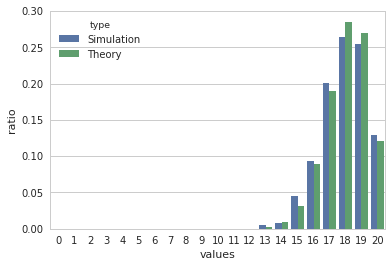

In [28]:
sns.barplot(x='values', y='ratio', hue='type', data=df)
plt.show()